# Usage examples: `pyleoclim.gen_ts()`

In [1]:
%load_ext autoreload
%autoreload 2
    
import pyleoclim as pyleo

## AR(1) series

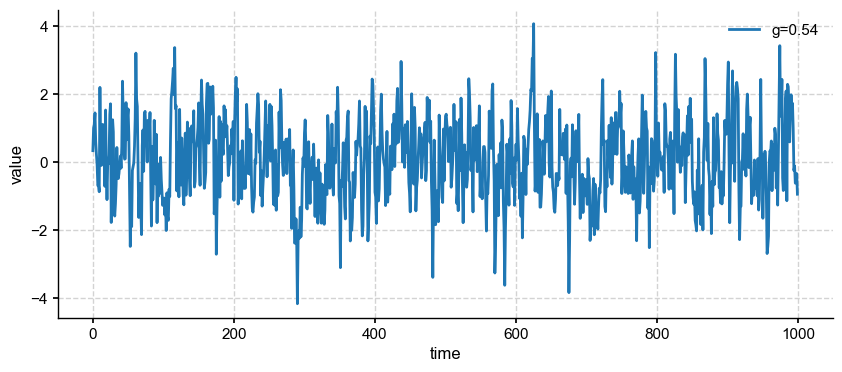

In [2]:
# default length nt=1000; default persistence parameter g=0.5
ts = pyleo.gen_ts(model='ar1')
g = pyleo.utils.tsmodel.ar1_fit(ts.value)
fig, ax = ts.plot(label=f'g={g:.2f}')

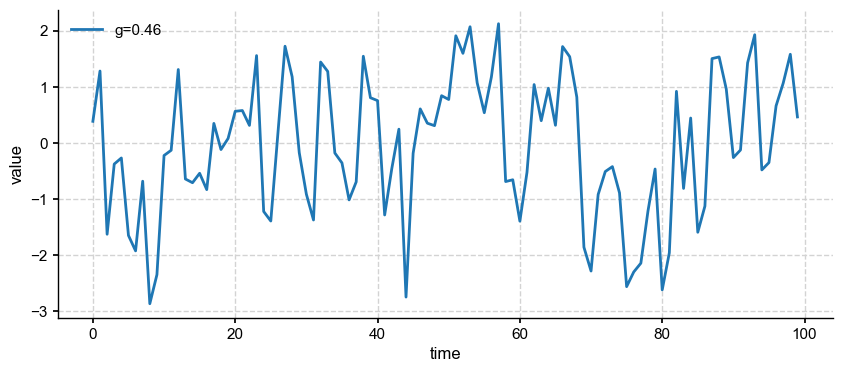

In [3]:
# use 'nt' to modify the data length
ts = pyleo.gen_ts(model='ar1', nt=100)
g = pyleo.utils.tsmodel.ar1_fit(ts.value)
fig, ax = ts.plot(label=f'g={g:.2f}')

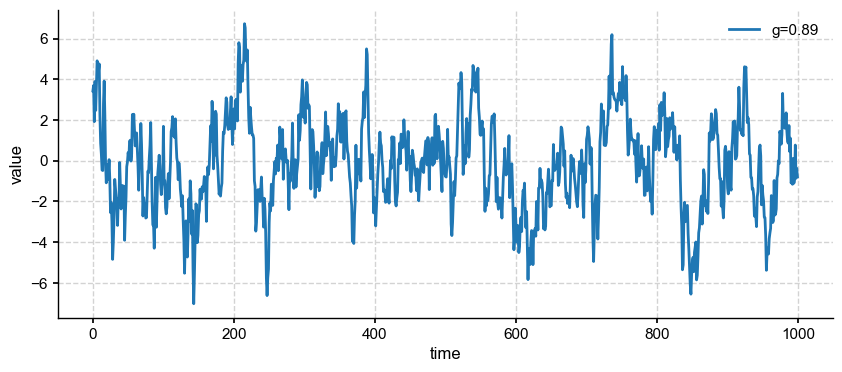

In [4]:
# use 'settings' to modify the persistence parameter 'g'
ts = pyleo.gen_ts(model='ar1', g=0.9)
g = pyleo.utils.tsmodel.ar1_fit(ts.value)
fig, ax = ts.plot(label=f'g={g:.2f}')

## Colored noise

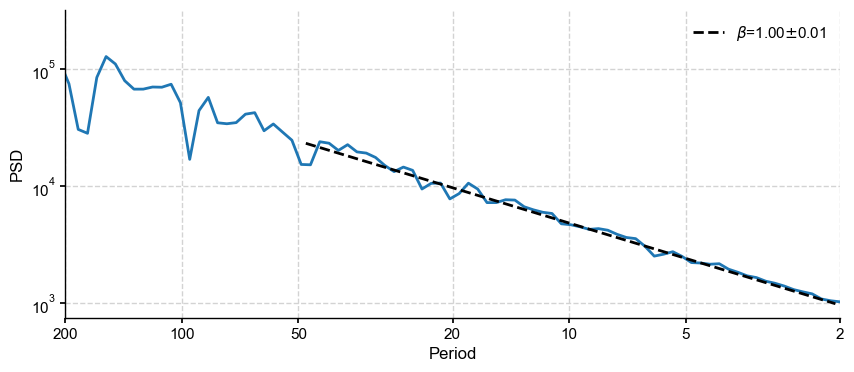

In [5]:
# default scaling slope 'alpha' is 1
ts = pyleo.gen_ts(model='colored_noise')
psd = ts.spectral()

# estimate the scaling slope
beta_info = psd.beta_est(fmin=1/50, fmax=1/2)

# visualize
fig, ax = psd.plot(mute=True)
ax.plot(1/beta_info['f_binned'], beta_info['Y_reg'], '--', c='k',
        label=fr'$\beta$={beta_info["beta"]:.2f}$\pm${beta_info["std_err"]:.2f}')
ax.legend()
pyleo.showfig(fig, close=True)

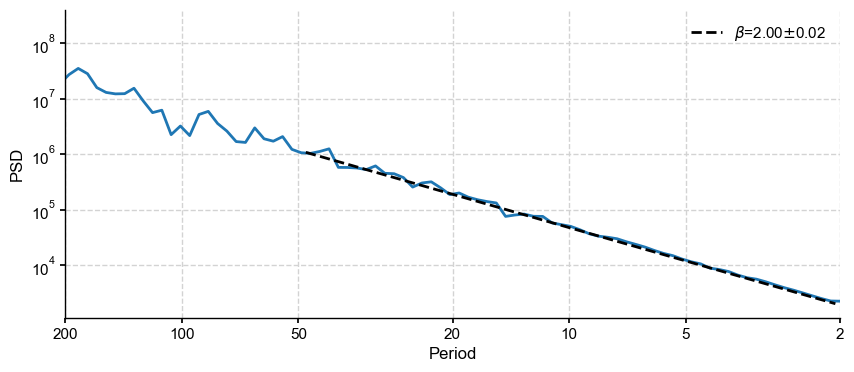

In [6]:
# modify 'alpha' with 'settings'
ts = pyleo.gen_ts(model='colored_noise', alpha=2)
psd = ts.spectral()

# estimate the scaling slope
beta_info = psd.beta_est(fmin=1/50, fmax=1/2)

# visualize
fig, ax = psd.plot(mute=True)
ax.plot(1/beta_info['f_binned'], beta_info['Y_reg'], '--', c='k',
        label=fr'$\beta$={beta_info["beta"]:.2f}$\pm${beta_info["std_err"]:.2f}')
ax.legend()
pyleo.showfig(fig, close=True)

## Colored noise with 2 regimes

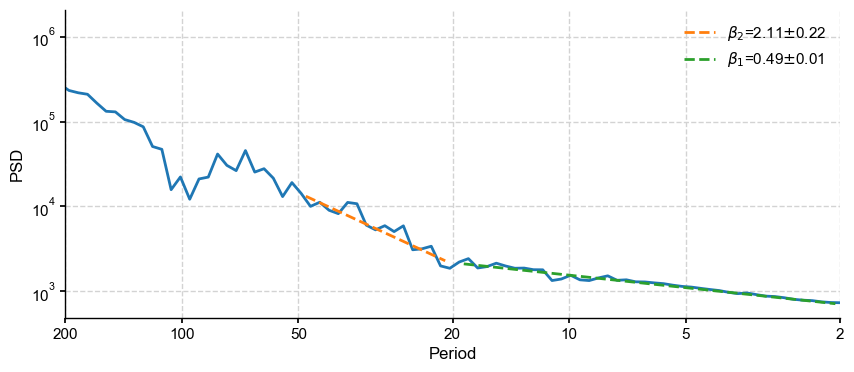

In [7]:
# default scaling slopes 'alpha1' is 0.5 and 'alpha2' is 2, with break at 1/20
ts = pyleo.gen_ts(model='colored_noise_2regimes')
psd = ts.spectral()

# estimate the scaling slope
beta_info_lf = psd.beta_est(fmin=1/50, fmax=1/20)
beta_info_hf = psd.beta_est(fmin=1/20, fmax=1/2)

# visualize
fig, ax = psd.plot(mute=True)
ax.plot(1/beta_info_lf['f_binned'], beta_info_lf['Y_reg'], '--',
        label=fr'$\beta_2$={beta_info_lf["beta"]:.2f}$\pm${beta_info_lf["std_err"]:.2f}')
ax.plot(1/beta_info_hf['f_binned'], beta_info_hf['Y_reg'], '--',
        label=fr'$\beta_1$={beta_info_hf["beta"]:.2f}$\pm${beta_info_hf["std_err"]:.2f}')
ax.legend()
pyleo.showfig(fig, close=True)

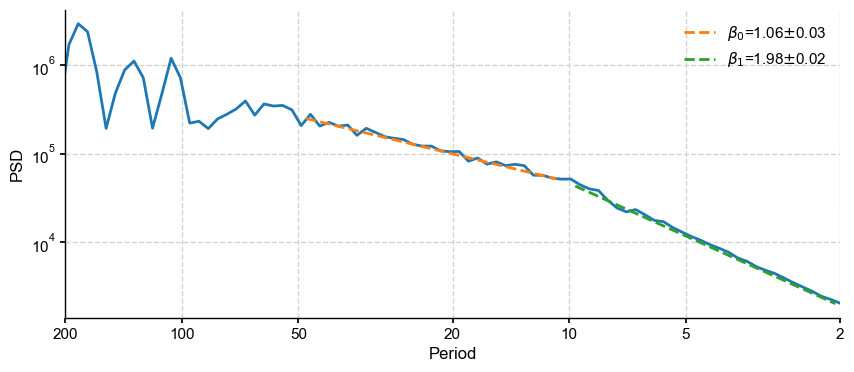

In [8]:
# modify the scaling slopes and scaling break with 'settings'
ts = pyleo.gen_ts(model='colored_noise_2regimes', alpha1=2, alpha2=1, f_break=1/10)
psd = ts.spectral()

# estimate the scaling slope
beta_info_lf = psd.beta_est(fmin=1/50, fmax=1/10)
beta_info_hf = psd.beta_est(fmin=1/10, fmax=1/2)

# visualize
fig, ax = psd.plot(mute=True)
ax.plot(1/beta_info_lf['f_binned'], beta_info_lf['Y_reg'], '--',
        label=fr'$\beta_0$={beta_info_lf["beta"]:.2f}$\pm${beta_info_lf["std_err"]:.2f}')
ax.plot(1/beta_info_hf['f_binned'], beta_info_hf['Y_reg'], '--',
        label=fr'$\beta_1$={beta_info_hf["beta"]:.2f}$\pm${beta_info_hf["std_err"]:.2f}')
ax.legend()
pyleo.showfig(fig, close=True)